In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
from env import Environment

In [3]:
import json
params = json.load(open("config.json", "r"))

In [4]:
# Fx, Fy : downsampling size
# features : number of features(channles) to put in the network. total input size would be (batch_size, Fx, Fy, features)
# memory_size : size of replay memory. 100000 needs almost 25GB memory, recommend reduce it if you need
# epsilon_initial : initial number of epsilon
# epsilon_final : last number of epsilon
# exploration_step : number of steps for pure exploration
# epsilon_step : number of steps for epsilon decrease
# gamma : discount rate
params

{'Fx': 84,
 'Fy': 84,
 'features': 4,
 'memory_size': 100000,
 'epsilon_initial': 1.0,
 'epsilon_final': 0.05,
 'exploration_step': 50000,
 'epsilon_step': 100000,
 'gamma': 0.99}

In [5]:
import tensorflow.contrib.eager as tfe
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'


In [6]:
env = Environment(params, device_name=device)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
q_active (DQN)               multiple                  144692    
_________________________________________________________________
q_target (DQN)               multiple                  144692    
Total params: 289,384
Trainable params: 144,692
Non-trainable params: 144,692
_________________________________________________________________


In [7]:
# 1000 episode(289763 step) of training takes 1.5 hours using GTX-1080ti 
# you can use pretrained weights below.
ret = env.train(episode=1000, max_step=1000, minibatch_size=32,initial_life=5, verbose = 50, saving=True)

  0%|          | 2/1000 [00:00<02:06,  7.91it/s]

[EPISODE   1 / STEP   125] - EXPLORATION
Learned Step :    0
AVG   Return : 0.0000
MAX   Return : 0.0000
saved step 0 in ckpt/


  5%|▌         | 51/1000 [00:08<02:31,  6.28it/s]

[EPISODE  50 / STEP  9533] - EXPLORATION
Learned Step :    0
AVG   Return : 1.4286
MAX   Return : 5.0000
saved step 0 in ckpt/


 10%|█         | 100/1000 [00:16<02:45,  5.42it/s]

[EPISODE 100 / STEP 18523] - EXPLORATION
Learned Step :    0
AVG   Return : 1.1800
MAX   Return : 8.0000
saved step 0 in ckpt/


 15%|█▌        | 150/1000 [00:26<02:34,  5.51it/s]

[EPISODE 150 / STEP 27856] - EXPLORATION
Learned Step :    0
AVG   Return : 1.2600
MAX   Return : 5.0000
saved step 0 in ckpt/


 20%|██        | 200/1000 [00:34<02:19,  5.72it/s]

[EPISODE 200 / STEP 37062] - EXPLORATION
Learned Step :    0
AVG   Return : 1.2200
MAX   Return : 4.0000
saved step 0 in ckpt/


 25%|██▌       | 251/1000 [00:42<02:11,  5.68it/s]

[EPISODE 250 / STEP 46376] - EXPLORATION
Learned Step :    0
AVG   Return : 1.2600
MAX   Return : 4.0000
saved step 0 in ckpt/


 30%|███       | 300/1000 [02:31<38:26,  3.30s/it]

[EPISODE 300 / STEP 55705] - EPSILON-GREEDY : 0.9458
Learned Step : 5706
AVG   Return : 1.3000
MAX   Return : 5.0000
saved step 5706 in ckpt/


 35%|███▌      | 350/1000 [05:31<49:40,  4.59s/it]

[EPISODE 350 / STEP 65279] - EPSILON-GREEDY : 0.8548
Learned Step : 15280
AVG   Return : 1.5000
MAX   Return : 7.0000
saved step 15280 in ckpt/


 40%|████      | 400/1000 [08:52<43:07,  4.31s/it]

[EPISODE 400 / STEP 75694] - EPSILON-GREEDY : 0.7559
Learned Step : 25695
AVG   Return : 2.0400
MAX   Return : 5.0000
saved step 25695 in ckpt/


 45%|████▌     | 450/1000 [12:31<38:45,  4.23s/it]

[EPISODE 450 / STEP 86751] - EPSILON-GREEDY : 0.6509
Learned Step : 36752
AVG   Return : 2.4000
MAX   Return : 6.0000
saved step 36752 in ckpt/


 50%|█████     | 500/1000 [16:10<47:24,  5.69s/it]

[EPISODE 500 / STEP 97599] - EPSILON-GREEDY : 0.5478
Learned Step : 47600
AVG   Return : 2.3200
MAX   Return : 11.0000
saved step 47600 in ckpt/


 55%|█████▌    | 550/1000 [20:37<35:41,  4.76s/it]

[EPISODE 550 / STEP 110759] - EPSILON-GREEDY : 0.4228
Learned Step : 60760
AVG   Return : 3.5400
MAX   Return : 10.0000
saved step 60760 in ckpt/


 60%|██████    | 600/1000 [24:54<34:09,  5.12s/it]

[EPISODE 600 / STEP 123105] - EPSILON-GREEDY : 0.3055
Learned Step : 73106
AVG   Return : 3.1400
MAX   Return : 9.0000
saved step 73106 in ckpt/


 65%|██████▌   | 650/1000 [30:03<30:27,  5.22s/it]

[EPISODE 650 / STEP 138410] - EPSILON-GREEDY : 0.1601
Learned Step : 88411
AVG   Return : 4.4200
MAX   Return : 12.0000
saved step 88411 in ckpt/


 70%|███████   | 700/1000 [35:31<28:42,  5.74s/it]

[EPISODE 700 / STEP 154735] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 104736
AVG   Return : 5.2000
MAX   Return : 17.0000
saved step 104736 in ckpt/


 75%|███████▌  | 750/1000 [43:12<43:35, 10.46s/it]

[EPISODE 750 / STEP 176595] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 126596
AVG   Return : 7.5000
MAX   Return : 17.0000
saved step 126596 in ckpt/


 80%|████████  | 800/1000 [51:41<29:45,  8.93s/it]

[EPISODE 800 / STEP 199528] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 149529
AVG   Return : 8.4200
MAX   Return : 15.0000
saved step 149529 in ckpt/


 85%|████████▌ | 850/1000 [1:01:14<26:15, 10.50s/it]

[EPISODE 850 / STEP 223641] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 173642
AVG   Return : 8.7200
MAX   Return : 17.0000
saved step 173642 in ckpt/


 90%|█████████ | 900/1000 [1:09:46<20:22, 12.23s/it]

[EPISODE 900 / STEP 244564] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 194565
AVG   Return : 7.3200
MAX   Return : 17.0000
saved step 194565 in ckpt/


 95%|█████████▌| 950/1000 [1:18:57<09:14, 11.09s/it]

[EPISODE 950 / STEP 267053] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 217054
AVG   Return : 8.3400
MAX   Return : 16.0000
saved step 217054 in ckpt/


100%|██████████| 1000/1000 [1:28:11<00:00, 10.18s/it]

[EPISODE 1000 / STEP 289763] - EPSILON-GREEDY[final] : 0.0500
Learned Step : 239764
AVG   Return : 8.0000
MAX   Return : 15.0000
saved step 239764 in ckpt/


In [8]:
env.simulate(10, render= True)

EPISODE   0: REWARD: 4.0
EPISODE   1: REWARD: 8.0
EPISODE   2: REWARD: 7.0
EPISODE   3: REWARD: 3.0
EPISODE   4: REWARD: 8.0
EPISODE   5: REWARD: 9.0
EPISODE   6: REWARD: 5.0
EPISODE   7: REWARD: 9.0
EPISODE   8: REWARD: 7.0
EPISODE   9: REWARD: 12.0
AVG REWARD : 7.2
MAX REWARD : 12.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

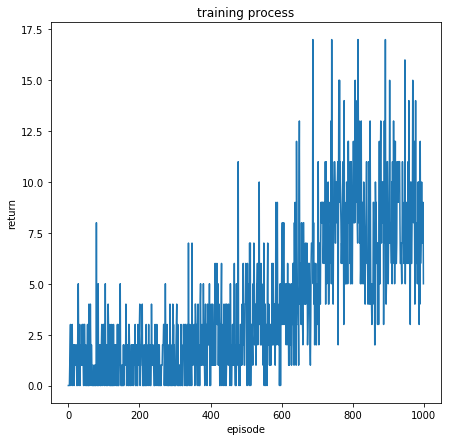

In [24]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set(title="training process")
ax.set(xlabel="episode")
ax.set(ylabel="return")
sns.lineplot(x=[i for i in range(len(ret))], y=ret)

In [9]:
# which was my best step
env.load(217054)

INFO:tensorflow:Restoring parameters from ckpt/-217054


In [10]:
env.simulate(10, render= True)

EPISODE   0: REWARD: 9.0
EPISODE   1: REWARD: 7.0
EPISODE   2: REWARD: 10.0
EPISODE   3: REWARD: 8.0
EPISODE   4: REWARD: 6.0
EPISODE   5: REWARD: 4.0
EPISODE   6: REWARD: 6.0
EPISODE   7: REWARD: 9.0
EPISODE   8: REWARD: 7.0
EPISODE   9: REWARD: 16.0
AVG REWARD : 8.2
MAX REWARD : 16.0
